# Exploring & Machine Learning for Airbnb Listings in Toronto

Airbnb does not provide open data in the sense of giant databases or dumps that we can work with. However, Inside Airbnb utilizes public information compiled from the Airbnb web-site and analyzes publicly available information about a city's Airbnb's listings, and provides filters and key metrics so we can see how Airbnb is being used in the major cities around the world. Inside Airbnb is an independent, non-commercial set of tools and data that is not associated with or endorsed by Airbnb or any of Airbnb's competitors.

However, the information provided by Inside Airbnb isn't going to be enough for us. We are going to download data from there for our own analysis. 

I will be working with Toronto data. Because I live here and I know some of the neighborhoods here. You are welcome to choose any city you prefer.

We are going to look at Airbnb listings and calendars, and trying to provide some exploratory analysis around predicting listing prices, both for, if we were hypothetically working at Airbnb, and also for a consumer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reviews = pd.read_csv('reviews.csv.gz')
# calendar = pd.read_csv('calendar.csv.gz')
# listings = pd.read_csv('listings.csv.gz')

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Calender

How busy is it for Airbnb hosts in Toronto?

In [2]:
calendar = pd.read_csv('calendar.csv.gz')
print('We have', calendar.date.nunique(), 'days and', calendar.listing_id.nunique(), 'unique listings in the calendar data.')

We have 365 days and 17333 unique listings in the calendar data.


In [3]:
calendar.date.min(), calendar.date.max()

('2018-10-06', '2019-10-05')

Calendar data covers one year time frame, that is, price and availability every day for the next one year.

In [4]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price         4069436
dtype: int64

In [5]:
calendar.shape

(6326545, 4)

In [6]:
calendar.head()

,listing_id,date,available,price
0,349827,2019-06-17,t,$200.00
1,349827,2019-06-16,t,$200.00
2,349827,2019-06-15,t,$200.00
3,349827,2019-06-14,t,$200.00
4,349827,2019-06-13,t,$200.00


In [7]:
calendar.available.value_counts()

f    4069436
t    2257109
Name: available, dtype: int64

f (false) means not available, t(true) means available.

Find out daily average availability for one year. Convert available column to 0 if available and 1 if not.

In [8]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


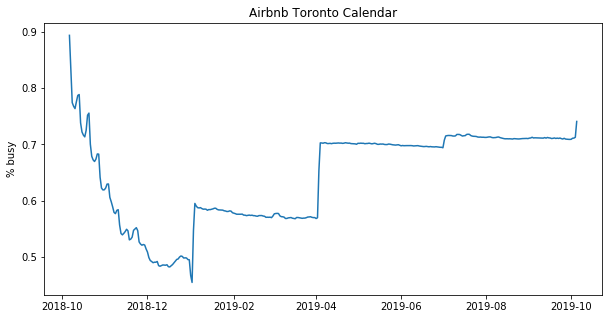

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb Toronto Calendar')
plt.ylabel('% busy')
plt.show();

The busiest month in Toronto was Oct which has just passed.The next busy months seems after April and extend to the summer. These are all within our experience and expectations.

In [78]:
calendar.head()

,listing_id,date,available,price,dayofweek
0,349827,2019-06-17,t,200.0,Monday
1,349827,2019-06-16,t,200.0,Sunday
2,349827,2019-06-15,t,200.0,Saturday
3,349827,2019-06-14,t,200.0,Friday
4,349827,2019-06-13,t,200.0,Thursday


### Price on the Calendar

How prices change over the year by month?

In [10]:
calendar.head()

,listing_id,date,available,price
0,349827,2019-06-17,t,$200.00
1,349827,2019-06-16,t,$200.00
2,349827,2019-06-15,t,$200.00
3,349827,2019-06-14,t,$200.00
4,349827,2019-06-13,t,$200.00


Remove "$" symbol in price column and convert it to numeric, and convert date to datetime data type.

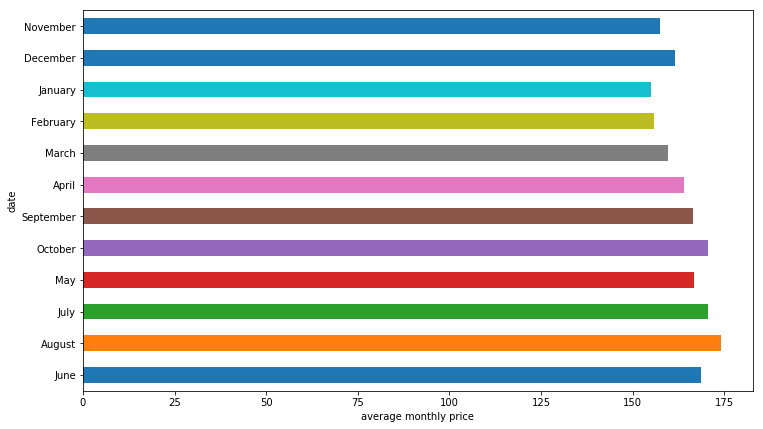

In [11]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');

The Airbnb price in Toronto increases in the months of July, August and October. Agreed, these three months are the best months visiting Toronto.

How price changes during day of week?

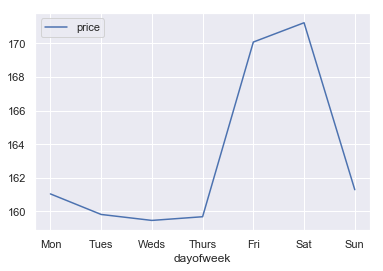

In [41]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.drop('listing_id', axis=1, inplace=True)
price_week.plot()
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);

Fridays and Saturdays are over $10 more expensive than the rest of the week.

### Listings

#### Number of listings in each neighbourhood

In [67]:
listings = pd.read_csv('listings.csv.gz')
print('We have', listings.id.nunique(), 'listings in the listing data.')

We have 17343 listings in the listing data.


C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
Waterfront Communities-The Island,3181
Niagara,807
Annex,711
Church-Yonge Corridor,592
Dovercourt-Wallace Emerson-Junction,517
Little Portugal,504
Bay Street Corridor,497
Trinity-Bellwoods,459
Kensington-Chinatown,449


The neighbourhood that has the highest number of listings is Waterfront Communities-The Island, and almost four times more than the second most neighbourhood (Niagara). From map at Inside Airbnb, we can see that too.

### review score rating

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


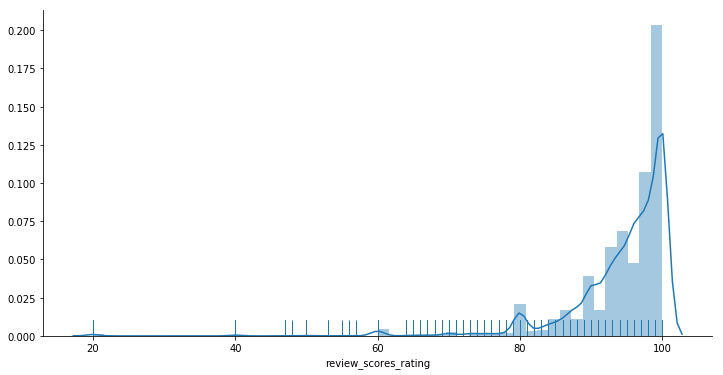

In [70]:
plt.figure(figsize=(12,6))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();

In [71]:
listings.review_scores_rating.describe()

count    14341.000000
mean        94.303884
std          7.759736
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

As expected, most of reviewers leave high scores.

### Exploring the price

In [11]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)

listings['price'].describe()

count    17343.000000
mean       144.363259
std        245.723788
min          0.000000
25%         65.000000
50%        100.000000
75%        166.000000
max      12933.000000
Name: price, dtype: float64

The most expensive Airbnb listing in Toronto is at $12933/night. From the listing url, it seems legitimate as far as I can tell.
https://www.airbnb.ca/rooms/16039481?locale=en. An Art Collector's Penthouse in Toronto's most stylish neighbourhood.

In [72]:
listings.iloc[np.argmax(listings['price'])]

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


id                                                                           16039481
listing_url                                     https://www.airbnb.com/rooms/16039481
scrape_id                                                              20181006000710
last_scraped                                                               2018-10-06
name                                                        Art Collector's Penthouse
summary                             This gorgeous penthouse will have you living l...
space                               Experience everything Toronto has to offer by ...
description                         This gorgeous penthouse will have you living l...
experiences_offered                                                              none
neighborhood_overview               Yorkville is one of Toronto's most dynamic and...
notes                               Toronto’s Top 10 Tourist Attractions: Air Cana...
transit                                               

I decided to remove listings that exceed $600/night, as well as 7 listings at price 0, for the following exploratory analysis.

In [73]:
listings.loc[listings['price'] > 600]['price'].describe()

count      205.000000
mean      1361.746341
std       1687.211496
min        603.000000
25%        740.000000
50%        850.000000
75%       1200.000000
max      12933.000000
Name: price, dtype: float64

In [75]:
listings.loc[listings['price'] == 0]['price'].count()

7

#### Listings price distribution after removing outliers

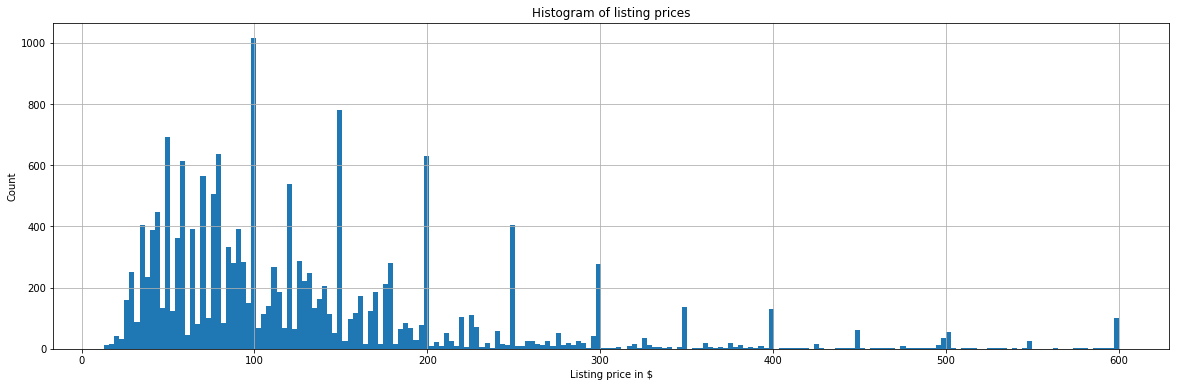

In [88]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

#### Neighbourhood vs. Price

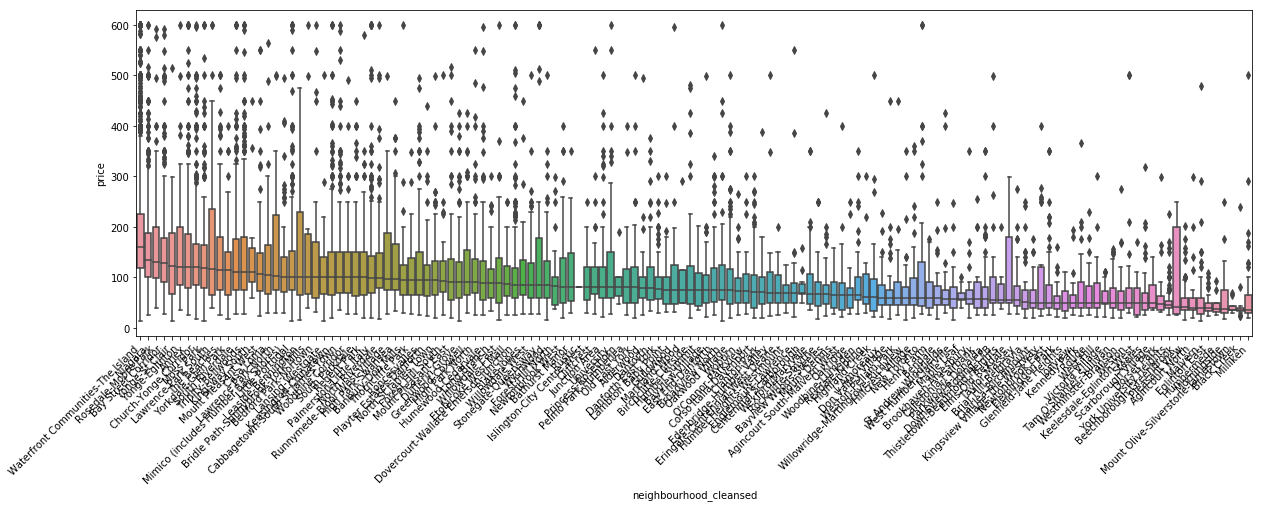

In [77]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

Not only Waterfront Communities-The Island has the highest number of listings, it also enjoys the highest median price, and Milliken has the lowest median price.

#### host vs. price

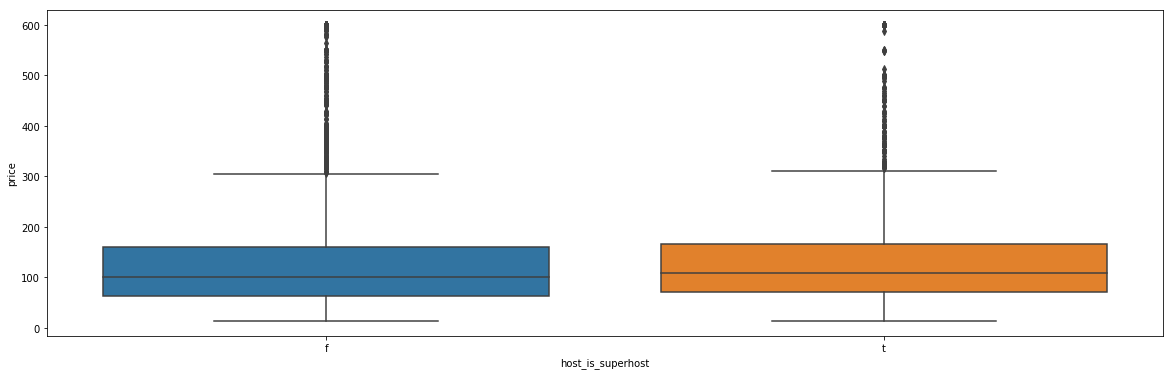

In [78]:
sns.boxplot(y='price', x='host_is_superhost', data=listings.loc[(listings.price <= 600) & (listings.price > 0)])
plt.show();

Super host does enjoy a little higher median price than normal host.

#### property type vs. price

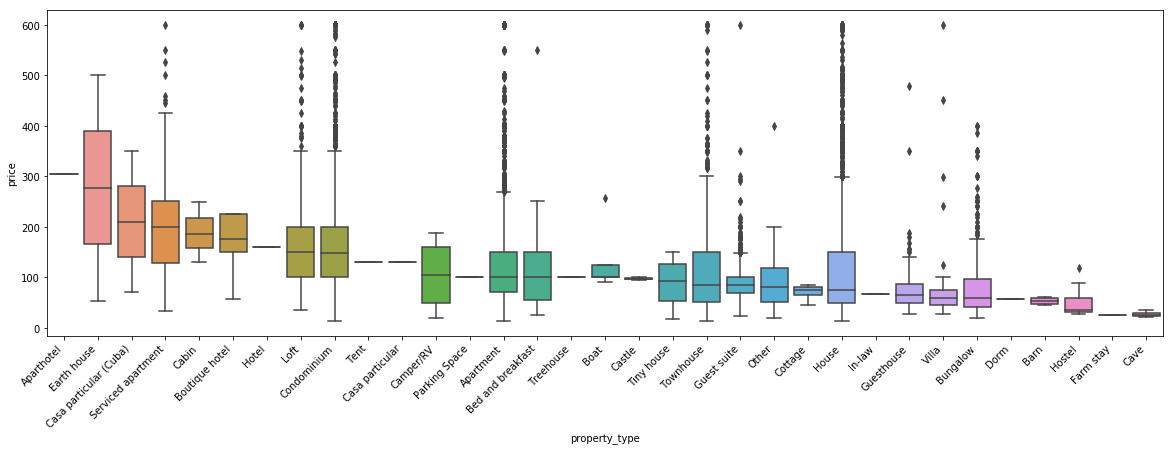

In [89]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

When we look at the median price for each property type, we have to be careful that we can't say "The most expensive property type is Aparthotel, and that Tent and Parking Space have a higher median price than Apartment and Castle.", because Aparthotel, tend and parking space has only one listing each.

In [90]:
listings.property_type.value_counts()

Apartment                 5810
House                     4611
Condominium               4019
Townhouse                  836
Guest suite                581
Bungalow                   462
Loft                       434
Serviced apartment         195
Bed and breakfast           95
Guesthouse                  92
Other                       59
Villa                       56
Boutique hotel              26
Hostel                      21
Barn                         6
Cottage                      5
Boat                         5
Tiny house                   4
Camper/RV                    4
Cave                         3
Cabin                        3
Farm stay                    2
Castle                       2
Casa particular (Cuba)       2
Earth house                  2
In-law                       1
Aparthotel                   1
Dorm                         1
Hotel                        1
Parking Space                1
Casa particular              1
Tent                         1
Treehous

#### room type vs. price

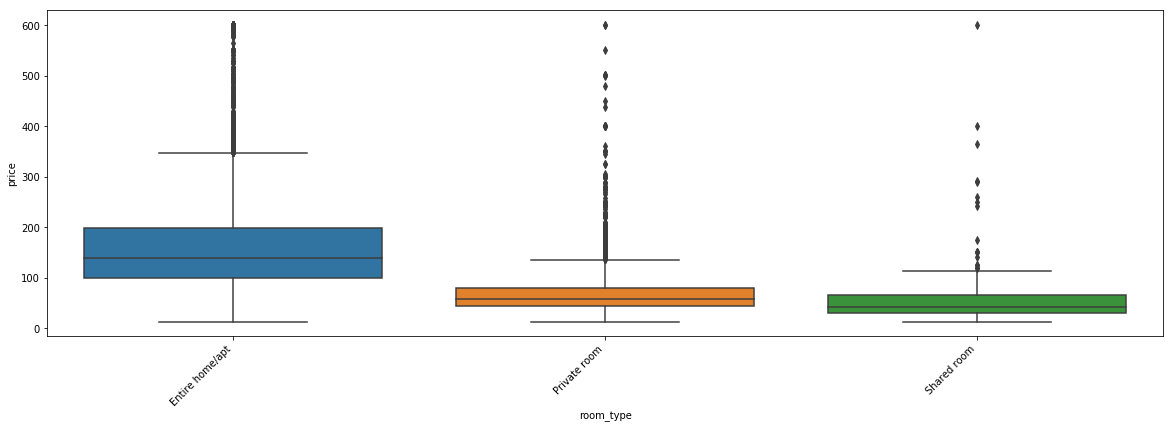

In [91]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

This goes without saying, entire room/apt has a a much higher median price than the other room types.

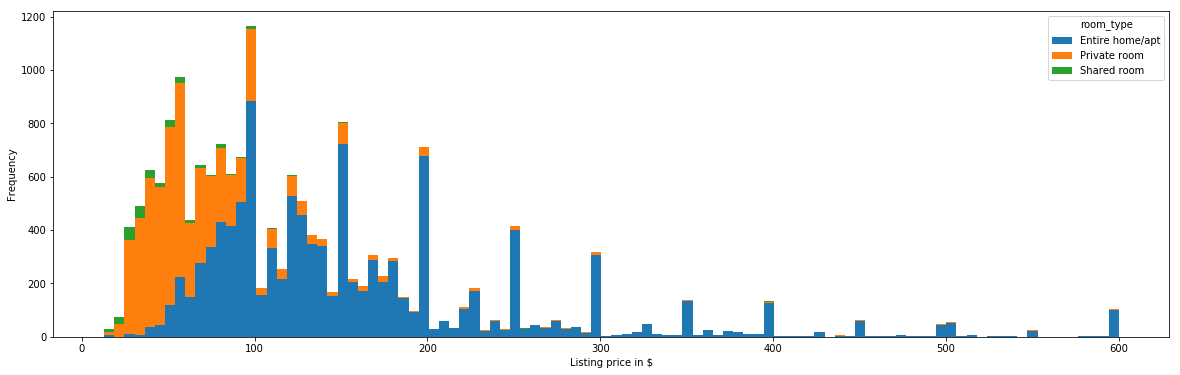

In [98]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $');

Entire home/apt also has the most number of listings. Inside Airbnb has indicated that Entire homes or apartments highly available year-round for tourists, probably don't have the owner present, could be illegal, and more importantly, are displacing residents. We will put our worries away for the moment.

#### bed type vs. price

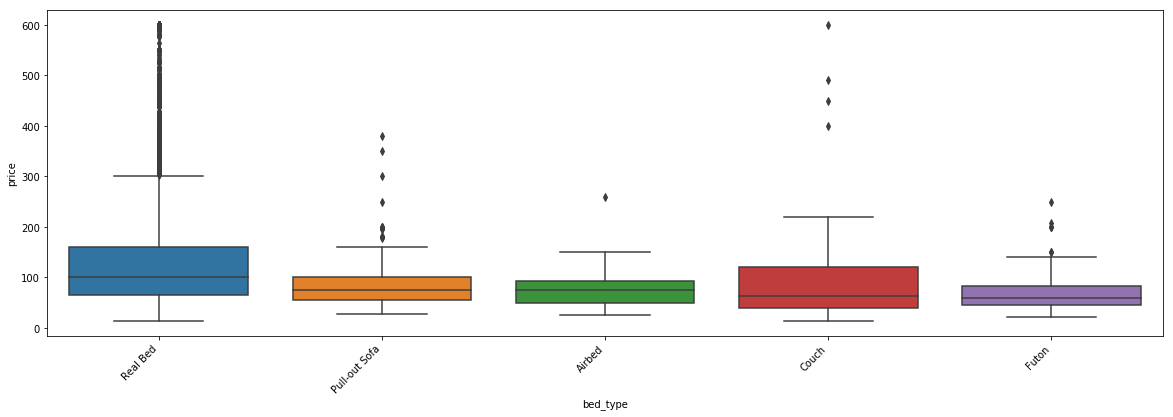

In [92]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bed_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

There is no surprise.

#### Amenities

The amenities text field needs some cleaning.

In [131]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [132]:
listings['amenities'].head()

0    TV,Internet,Wifi,Air conditioning,Kitchen,Indo...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Poo...
2    Wifi,Air conditioning,Kitchen,Free parking on ...
3    Internet,Wifi,Pets live on this property,Cat(s...
4    Internet,Wifi,Air conditioning,Kitchen,Free pa...
Name: amenities, dtype: object

#### Top 20 most common amenities

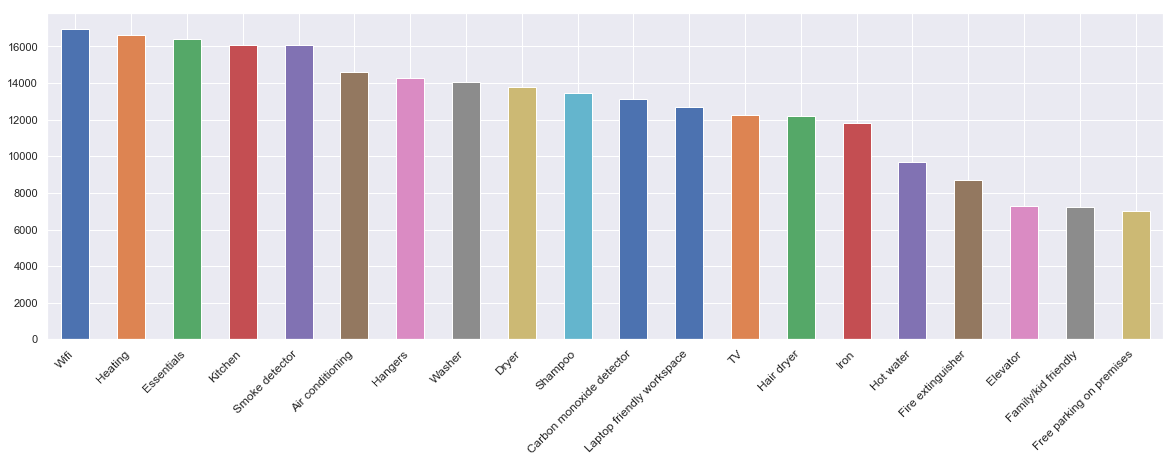

In [145]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

Wifi, heating, essential, kitchen and smoke detector etc are among the most common amenities.

#### Amenities vs. price top 20

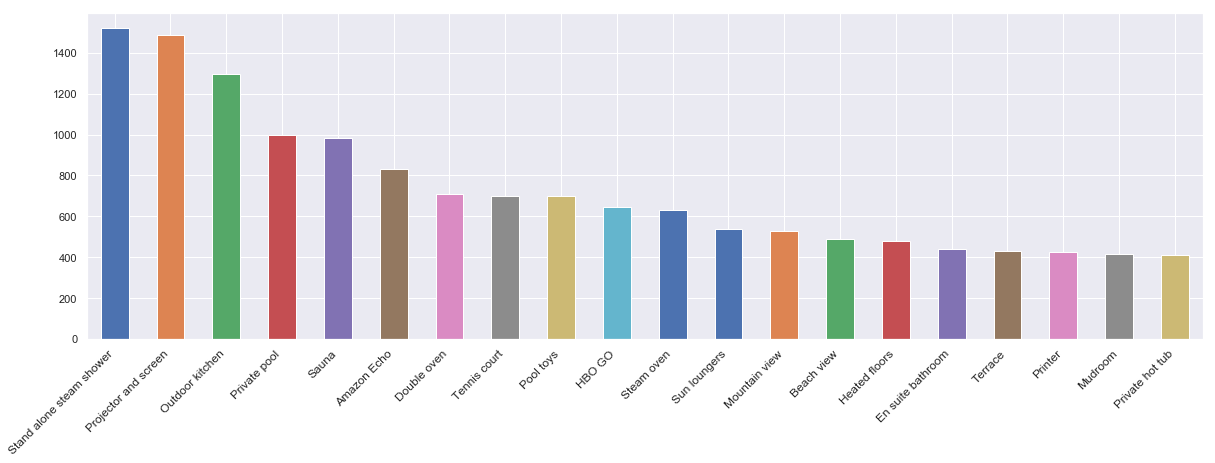

In [147]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

Interesting, amenities feature does seem to have some relationship with price.

#### Number of beds vs. price

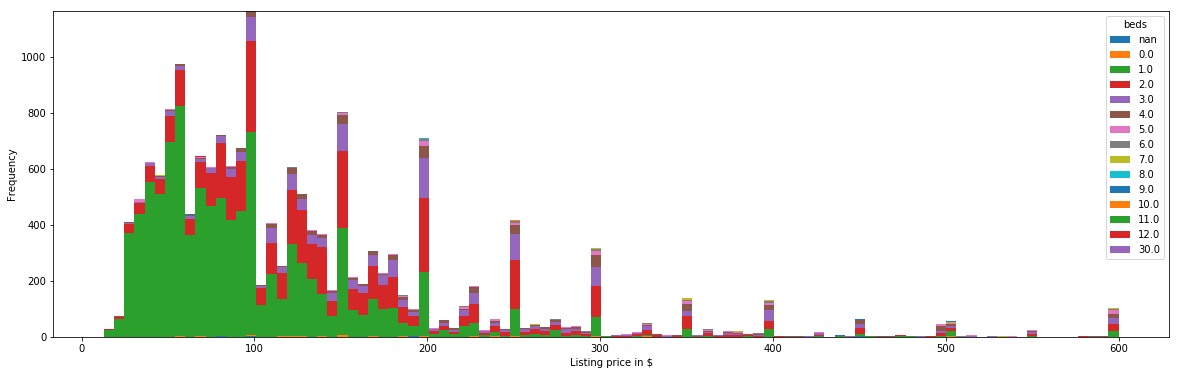

In [104]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

Vast majority of the listings have one bed, the one-bed listing prices have a very wide range. There are listings that have no bed.

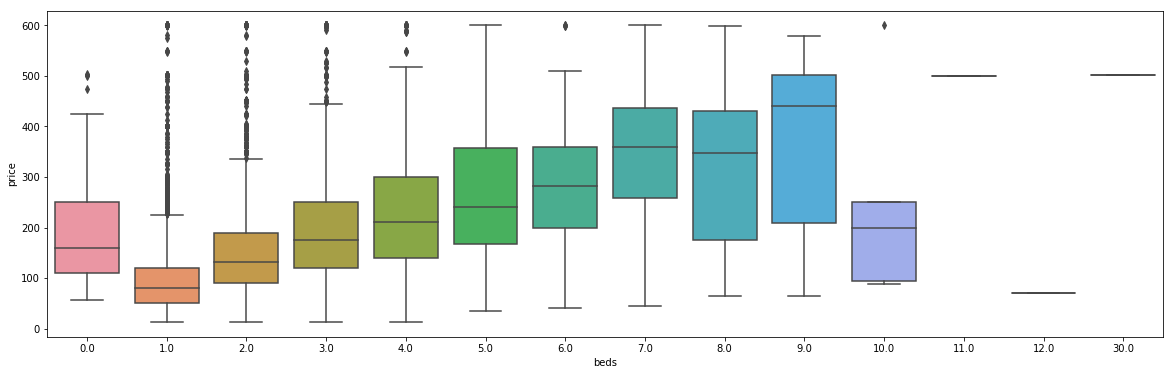

In [106]:
sns.boxplot(y='price', x='beds', data = listings.loc[(listings.price <= 600) & (listings.price > 0)])
plt.show();

Interesting to discover that the median price for no bed listings is higher than 1-bed and 2-bed listings, and median price for 10-bed listings is very low.

#### numeric features

We select several numeric features and try to explore them all together.

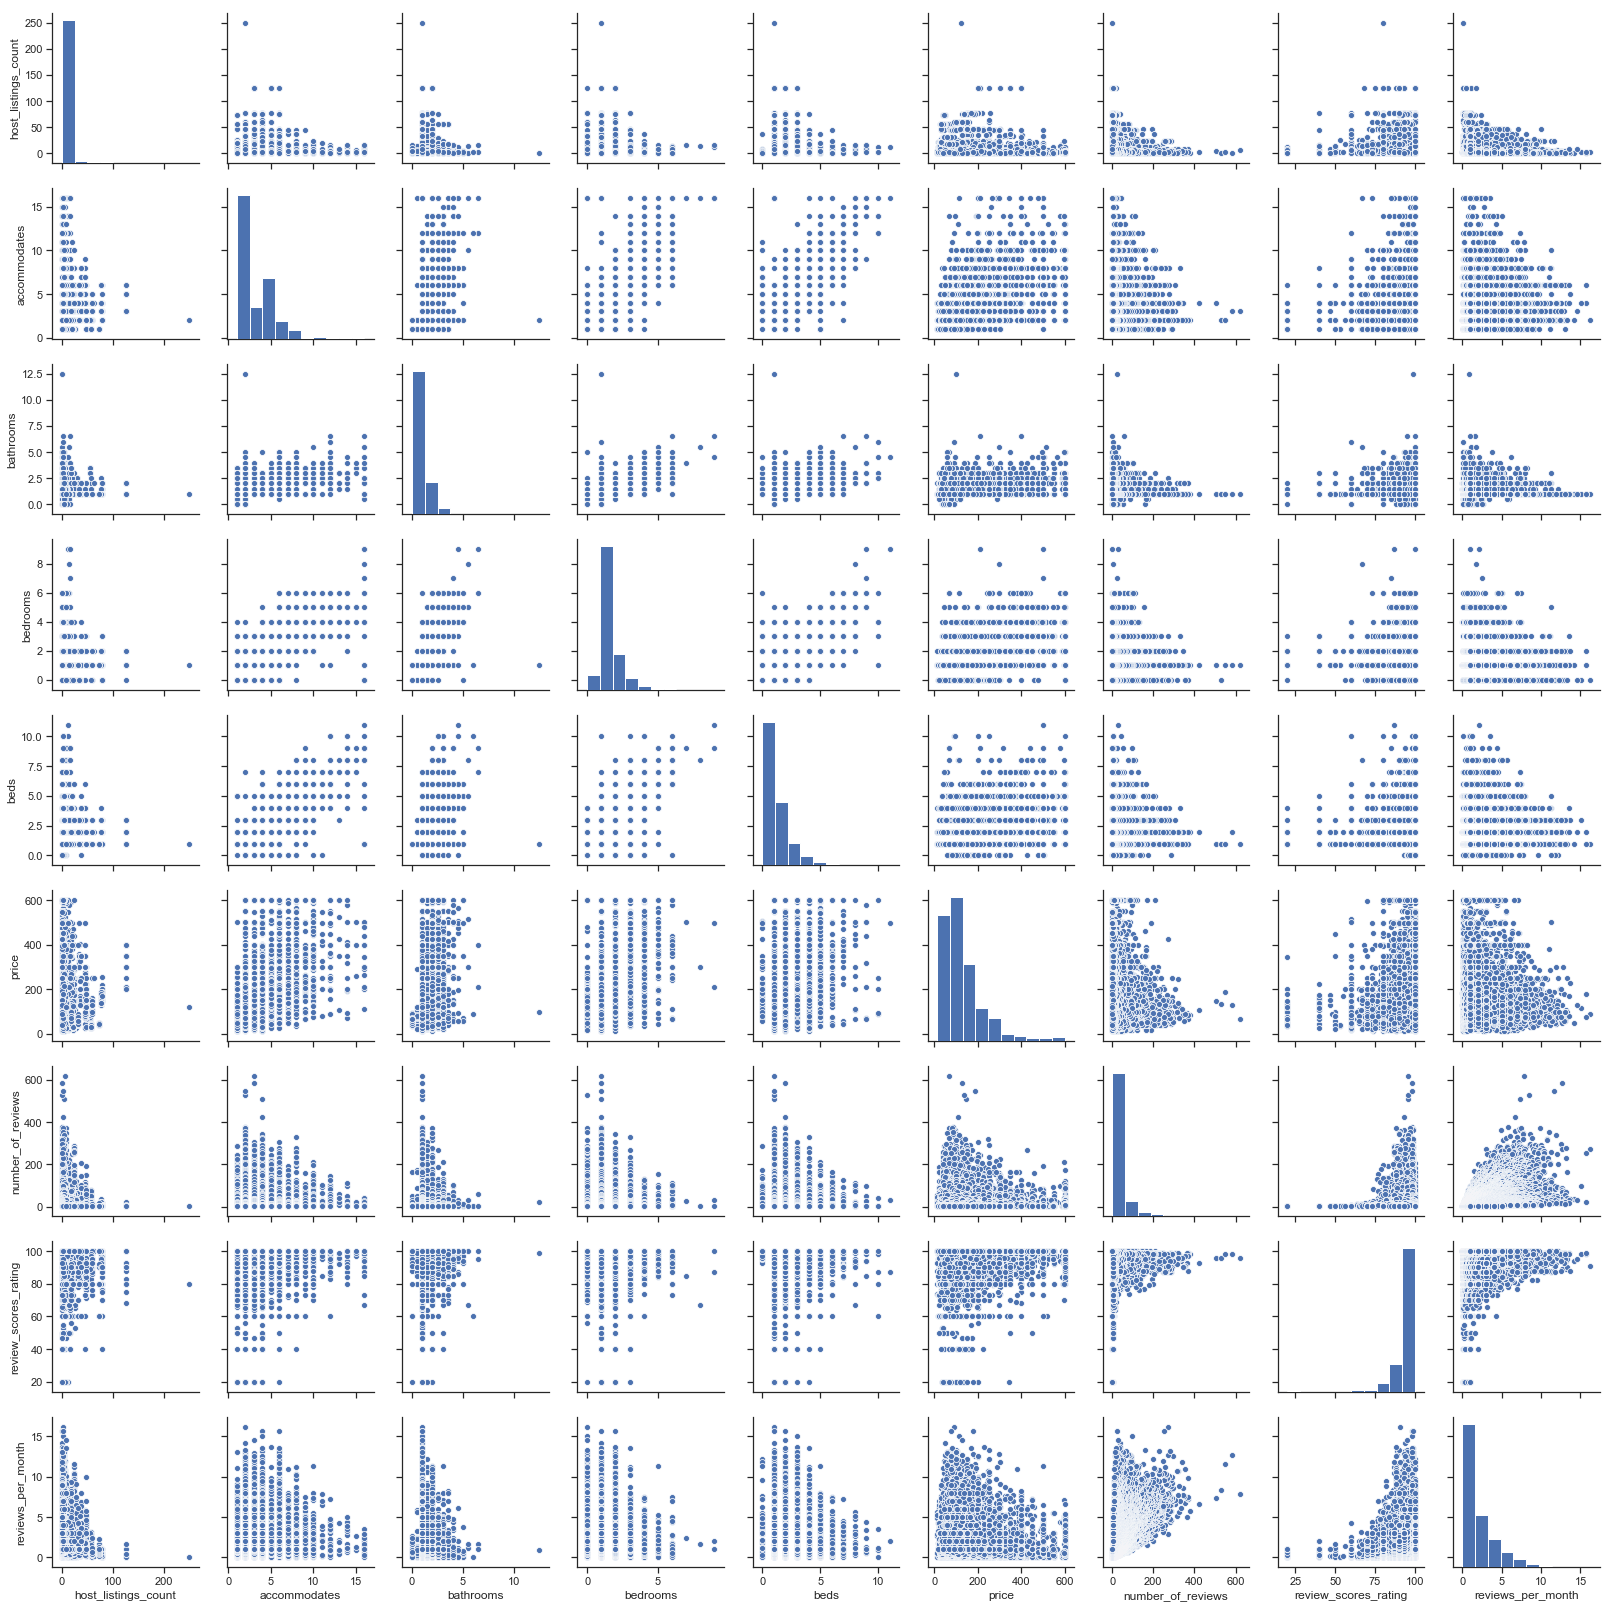

In [121]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
sns.set(style="ticks", color_codes=True)
sns.pairplot(listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna())
plt.show();

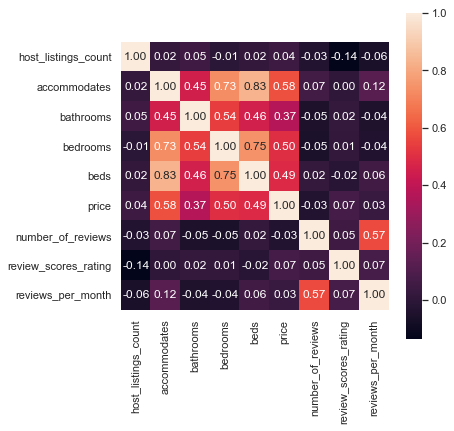

In [122]:
corr = listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

There are some not bad news such as number of bedrooms and accommodates seem to be correlated with price.

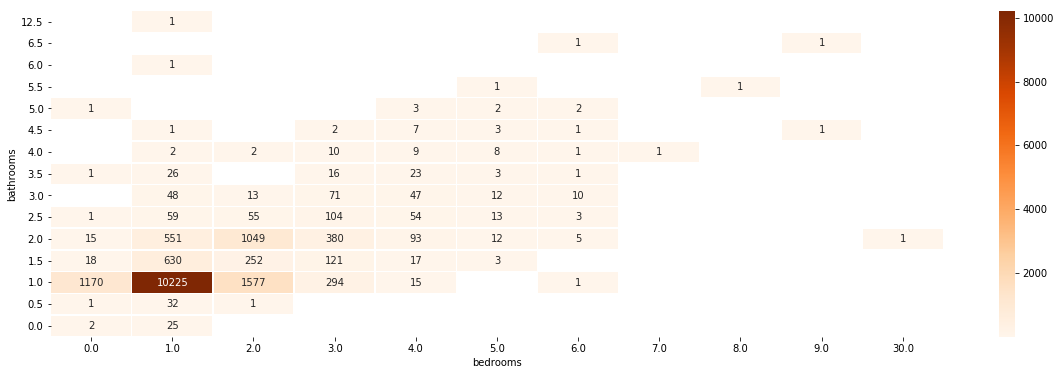

In [111]:
sns.heatmap(listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show();

Vast majority of listings have one bedroom and 1 bathroom.

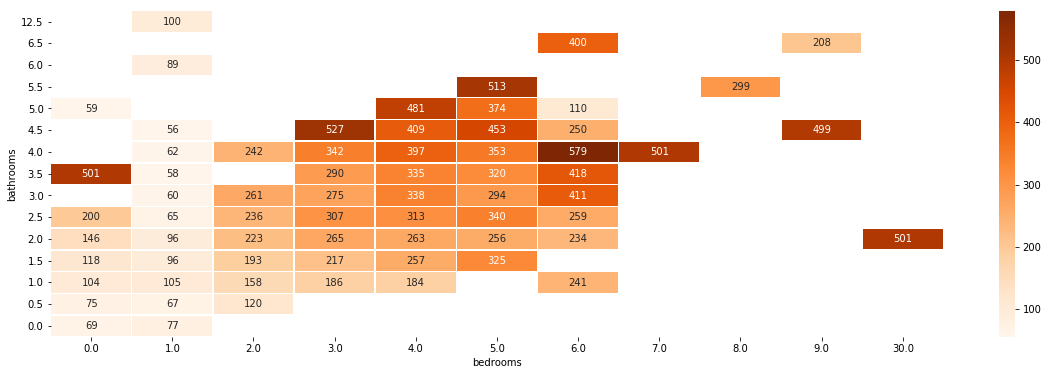

In [112]:
sns.heatmap(listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show();

It looks like listings with 6 bedrooms and 4 bathrooms have the highest median price. But we must be skeptical about this finding because from the above single graph, we don't know how many listings in this category.

## Modeling Lising Prices

### Data preprocessing and feature engineering

In [3]:
listings = pd.read_csv('listings.csv.gz')

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processing price feature. The feature we are going to model and predict.

In [4]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings = listings.loc[(listings.price <= 600) & (listings.price > 0)]

Term document matrix for amenities feature.

In [5]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [7]:
listings.amenities.head()

0    TV,Internet,Wifi,Air conditioning,Kitchen,Indo...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Poo...
2    Wifi,Air conditioning,Kitchen,Free parking on ...
3    Internet,Wifi,Pets live on this property,Cat(s...
4    Internet,Wifi,Air conditioning,Kitchen,Free pa...
Name: amenities, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

Replace the values in the following feature to 0 if "f", to 1 if "t".

In [15]:
columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    listings[c] = listings[c].replace('f',0,regex=True)
    listings[c] = listings[c].replace('t',1,regex=True)

Same way to clean up the other money value columns.

In [17]:
listings['security_deposit'] = listings['security_deposit'].fillna(value=0)
listings['security_deposit'] = listings['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(value=0)
listings['cleaning_fee'] = listings['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)

The following are the numeric features we will be using.

In [25]:
listings_new = listings[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]

Fill the missing values in the numeric features with median.

In [26]:
for col in listings_new.columns[listings_new.isnull().any()]:
    print(col)

host_is_superhost
host_identity_verified
host_has_profile_pic
host_listings_count
host_total_listings_count
bathrooms
bedrooms
review_scores_rating


In [27]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())

C:\Users\SusanLi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Processing Categorical features

In [29]:
for cat_feature in ['zipcode', 'property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)

Adding amenities feature

In [34]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

Data preprocessing and feature engineering done!

### Random Forest Regressor

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 63.943
R^2 test: 0.572


#### Feature importance of Random Forest

In [49]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
6097,Entire home/apt,0.158751
14,bedrooms,0.120349
9,cleaning_fee,0.106169
13,bathrooms,0.092024
6227,Waterfront Communities-The Island,0.030158
8,security_deposit,0.024588
16,number_of_reviews,0.024188
12,minimum_nights,0.023324
17,review_scores_rating,0.012813
15,guests_included,0.010889


### LightGBM

In [77]:
from lightgbm import LGBMRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }

In [78]:
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

In [79]:
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)

Training until validation scores don't improve for 20 rounds.
[100]	valid's rmse: 72.8972
[200]	valid's rmse: 66.2004
[300]	valid's rmse: 63.2179
[400]	valid's rmse: 61.9242
[500]	valid's rmse: 61.1144
[600]	valid's rmse: 60.7562
[700]	valid's rmse: 60.5045
[800]	valid's rmse: 60.3097
[900]	valid's rmse: 60.118
[1000]	valid's rmse: 59.9533
Did not meet early stopping. Best iteration is:
[998]	valid's rmse: 59.9532


LGBMRegressor_GainFE(boosting_type='gbdt', class_weight=None,
           colsample_bytree=0.9, learning_rate=0.01, max_depth=20,
           metric='rmse', min_child_samples=20, min_child_weight=0.001,
           min_split_gain=0.0, n_estimators=1000, n_jobs=4, num_leaves=25,
           objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
           silent=True, subsample=0.9, subsample_for_bin=200000,
           subsample_freq=0)

In [80]:
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

R^2 test: 0.624


#### Feature importance of LightGBM

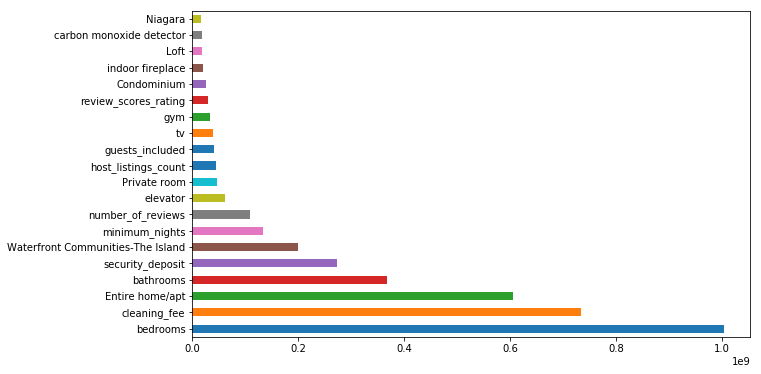

In [81]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))